In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [3]:
train_df = pd.read_csv("data/train_new.csv")
# Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# Drop the null rows
train_df = train_df.dropna()
train_df = train_df.drop(columns = ['Date of Joining'])

train_df.count()

Gender                  18590
Company Type            18590
WFH Setup Available     18590
Designation             18590
Resource Allocation     18590
Mental Fatigue Score    18590
Burn Rate               18590
dtype: int64

In [4]:
train_df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,1,0,0,2.0,3.0,3.8,0.16
1,0,0,1,1.0,2.0,5.0,0.36
3,0,0,1,1.0,1.0,2.6,0.20
4,1,0,0,3.0,7.0,6.9,0.52
5,0,1,1,2.0,4.0,3.6,0.29


In [5]:
selected_features = train_df.drop(columns = ['Gender'])

selected_features

,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,0,2.0,3.0,3.8,0.16
1,0,1,1.0,2.0,5.0,0.36
3,0,1,1.0,1.0,2.6,0.20
4,0,0,3.0,7.0,6.9,0.52
5,1,1,2.0,4.0,3.6,0.29
...,...,...,...,...,...,...
22743,1,1,1.0,3.0,6.0,0.48
22744,1,0,3.0,7.0,6.2,0.54
22746,1,1,3.0,6.0,6.7,0.59
22748,0,0,2.0,5.0,5.9,0.52


In [6]:
#split train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, train_df['Gender'], random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.915/0.537
k: 3, Train/Test Score: 0.755/0.545
k: 5, Train/Test Score: 0.699/0.552
k: 7, Train/Test Score: 0.671/0.560
k: 9, Train/Test Score: 0.656/0.557
k: 11, Train/Test Score: 0.642/0.562
k: 13, Train/Test Score: 0.635/0.562
k: 15, Train/Test Score: 0.631/0.569
k: 17, Train/Test Score: 0.626/0.571
k: 19, Train/Test Score: 0.625/0.567
k: 21, Train/Test Score: 0.618/0.576
k: 23, Train/Test Score: 0.617/0.580
k: 25, Train/Test Score: 0.619/0.580
k: 27, Train/Test Score: 0.614/0.582
k: 29, Train/Test Score: 0.613/0.579


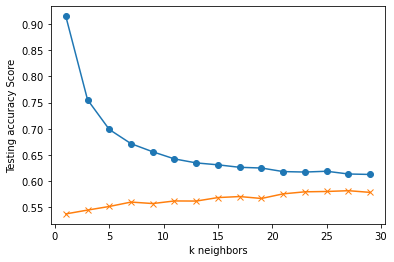

In [11]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()